In [ ]:
#importing weather data for Bonn
import pandas as pd
import requests
# URL of the webpage containing JSON data
url = "http://139.174.11.24/data?dataset=weatherdataforcities&start=2019-01-01&end=2023-12-31&cityName=Bonn"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON data
    bonn_data = response.json()

    # Convert the data to a DataFrame
    bonn_df = pd.DataFrame.from_dict(bonn_data , orient='index')

    # Reset the index to convert the timestamp to a column
    bonn_df.reset_index(inplace=True)

else:
    print("Failed to fetch data. Status code:", response.status_code)





In [ ]:
#Drop unwanted columns
bonn_df = bonn_df.drop(columns = ["index", "time","snow","cityName"])

In [ ]:

# drop unwanted columns


bonn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    43824 non-null  float64
 1   dwpt    43824 non-null  float64
 2   rhum    43824 non-null  float64
 3   prcp    43824 non-null  float64
 4   wdir    43824 non-null  float64
 5   wspd    43824 non-null  float64
 6   wpgt    43824 non-null  float64
 7   pres    43824 non-null  float64
 8   tsun    43689 non-null  float64
 9   coco    43586 non-null  float64
dtypes: float64(10)
memory usage: 3.3 MB


In [ ]:
bonn_df.head()

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
0,8.2,7.0,92.0,0.0,260.0,10.4,21.0,1033.0,0.0,4.0
1,8.1,6.7,91.0,0.0,270.0,11.9,24.0,1032.6,0.0,4.0
2,8.1,6.1,87.0,0.0,280.0,15.8,26.0,1032.4,0.0,4.0
3,7.7,5.8,88.0,0.0,270.0,15.5,31.0,1031.7,0.0,7.0
4,7.1,6.2,94.0,0.0,280.0,14.0,28.0,1031.2,0.0,7.0


In [ ]:
#Checking for null values
bonn_df.isnull().sum()

temp      0
dwpt      0
rhum      0
prcp      0
wdir      0
wspd      0
wpgt      0
pres      0
tsun    135
coco    238
dtype: int64

In [ ]:
# find the percentage of missing values in each feature
bonn_df.isnull().sum()/len(bonn_df) *100

temp    0.000000
dwpt    0.000000
rhum    0.000000
prcp    0.000000
wdir    0.000000
wspd    0.000000
wpgt    0.000000
pres    0.000000
tsun    0.308050
coco    0.543081
dtype: float64

In [ ]:
# Check if -99999 exists in all columns and print columns where it exists
columns_with_value = bonn_df.apply(lambda col: col.name if -99999 in col.values else None).dropna()

if len(columns_with_value) > 0:
    print(f"The value '{-99999}' exists in the following columns:")
    for col in columns_with_value:
        print(col)
else:
    print(f"The value '{-99999}' does not exist in any column.")

The value '-99999' does not exist in any column.


In [ ]:
mask_nntsun = bonn_df['tsun'].isnull()
bonn_df[mask_nntsun]

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
753,1.9,-0.2,86.0,0.0,140.0,16.2,25.0,990.6,NaN,3.0
754,2.2,0.1,86.0,0.0,140.0,14.4,22.0,990.9,NaN,4.0
755,2.9,0.5,84.0,0.0,130.0,14.8,21.0,991.4,NaN,3.0
756,4.5,0.8,77.0,0.0,130.0,16.9,24.0,990.7,NaN,2.0
757,4.3,0.6,77.0,0.0,130.0,16.6,24.0,990.7,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...
41558,24.0,16.0,61.0,0.0,320.0,5.4,16.7,1017.0,NaN,3.0
41559,23.0,16.1,65.0,0.0,330.0,5.4,14.8,1017.0,NaN,3.0
41560,22.0,16.9,73.0,0.0,320.0,9.4,11.1,1017.0,NaN,3.0
41561,20.0,16.0,78.0,0.0,350.0,9.4,13.0,1017.0,NaN,3.0


In [ ]:
#Using Linear Regression Imputation to fill missing values in the tsun feature
from sklearn.linear_model import LinearRegression
# seperate the null  values of the tsun feature
test =  bonn_df[bonn_df["tsun"].isnull()]
X_test = test.drop(columns = ["tsun","coco"] )
#Dropping the null values from the dataset
train = bonn_df.dropna()
#Splitting the train data into target and feature
X_train= train.drop(columns = ["tsun","coco"])
y_train = train["tsun"]

#Calling the linear regression model
lr = LinearRegression()
#Fitting the tranining data in to the model
lr.fit(X_train, y_train)
#Predicting the missing tsun values
y_pred = lr.predict(X_test)
#Replacing the missing values with the model prediction
bonn_df.loc[bonn_df.tsun.isnull(),"tsun"] = y_pred

In [ ]:

# seperate the null  values of the coco feature
test_coco =  bonn_df[bonn_df["coco"].isnull()]
X_test_coco = test_coco.drop("coco", axis = 1)
train_coco = bonn_df.dropna()
X_train_coco= train_coco.drop(columns = "coco")
y_train_coco = train_coco["coco"]
lr2 = LinearRegression()
lr2.fit(X_train_coco, y_train_coco)
#Predicting the missing tsun values
y_pred2 = lr2.predict(X_test_coco)
#Replacing the missing values with the model prediction
bonn_df.loc[bonn_df.coco.isnull(),"coco"] = y_pred2

In [ ]:
#Check if missing values still exist
bonn_df.isnull().sum()/len(bonn_df) *100


temp    0.0
dwpt    0.0
rhum    0.0
prcp    0.0
wdir    0.0
wspd    0.0
wpgt    0.0
pres    0.0
tsun    0.0
coco    0.0
dtype: float64

In [ ]:
#Check if missing values still exists for the tsun feature
bonn_df.isnull().sum()/len(bonn_df) *100

temp    0.000000
dwpt    0.000000
rhum    0.000000
prcp    0.000000
wdir    0.000000
wspd    0.000000
wpgt    0.000000
pres    0.000000
tsun    0.000000
coco    0.543081
dtype: float64

In [ ]:

bonn_df.isnull().sum()

temp    0
dwpt    0
rhum    0
prcp    0
wdir    0
wspd    0
wpgt    0
pres    0
tsun    0
coco    0
dtype: int64

In [ ]:
bonn_df.describe()

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43689.000000,43586.000000
mean,11.661049,6.491158,73.787628,0.089586,185.671595,12.158621,21.549701,1016.415626,11.875987,4.000528
std,7.345322,5.851954,18.517547,0.535722,86.918938,6.394934,11.805058,9.859591,21.360226,3.097250
min,-12.800000,-15.200000,13.000000,0.000000,0.000000,0.700000,2.000000,973.000000,0.000000,1.000000
25%,6.200000,2.300000,62.000000,0.000000,120.000000,7.200000,13.000000,1010.700000,0.000000,2.000000
50%,11.100000,6.600000,78.000000,0.000000,170.000000,10.800000,18.000000,1016.900000,0.000000,4.000000
75%,16.800000,11.000000,89.000000,0.000000,260.000000,15.800000,28.000000,1022.700000,13.000000,4.000000
max,39.600000,21.100000,100.000000,43.500000,360.000000,54.400000,115.000000,1049.400000,60.000000,26.000000


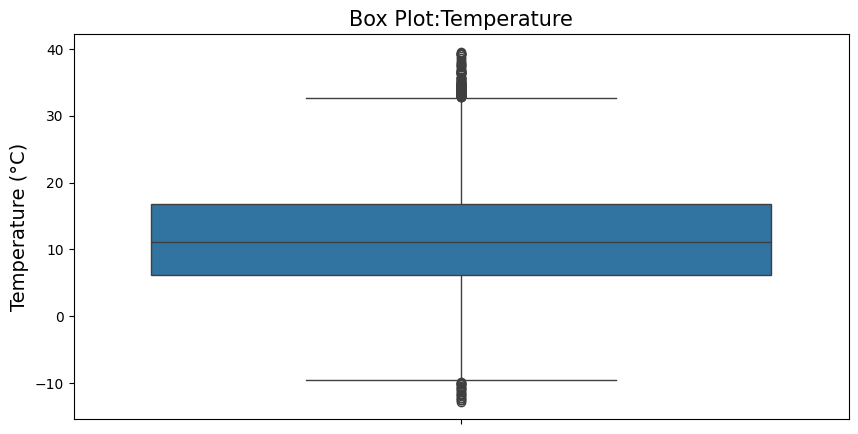

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
sns.boxplot(bonn_df.temp)
plt.title('Box Plot:Temperature', fontsize=15)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.show()

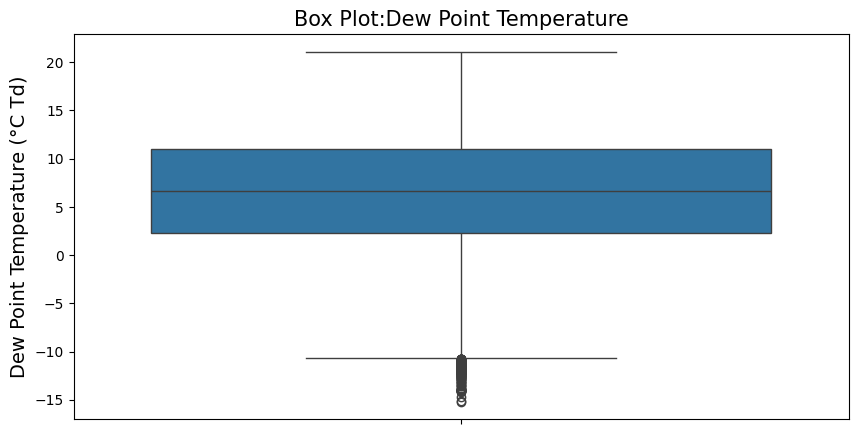

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(bonn_df.dwpt)
plt.title('Box Plot:Dew Point Temperature', fontsize=15)
plt.ylabel('Dew Point Temperature (°C Td)', fontsize=14)
plt.show()

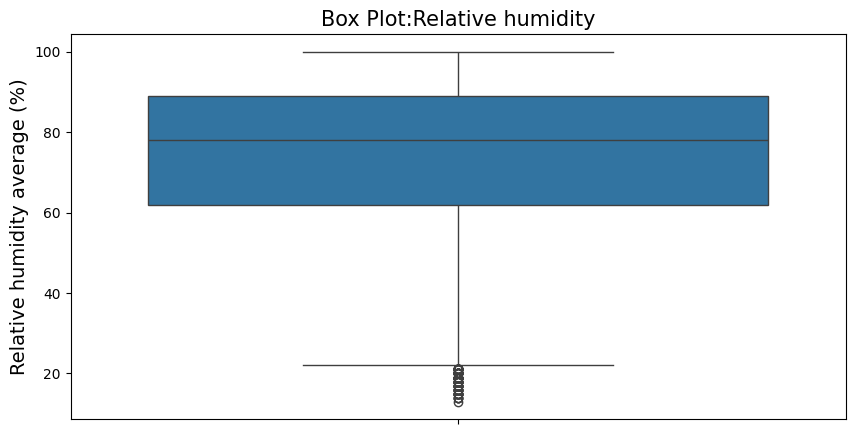

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(bonn_df.rhum)
plt.title('Box Plot:Relative humidity', fontsize=15)
plt.ylabel('Relative humidity average (%)', fontsize=14)
plt.show()

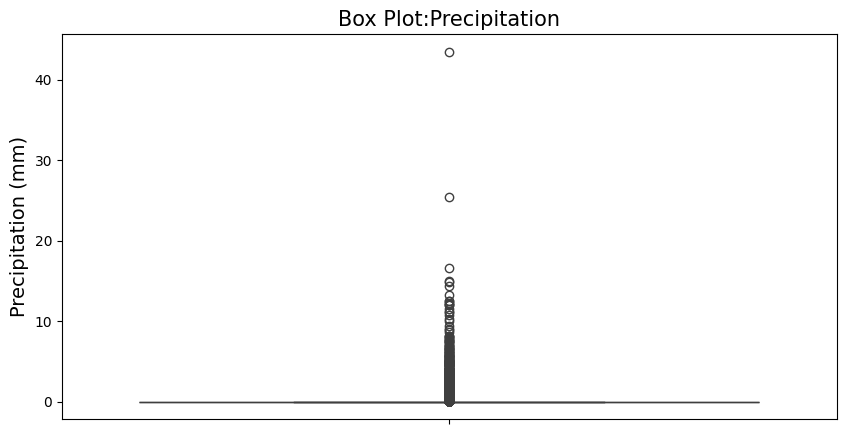

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(bonn_df.prcp)
plt.title('Box Plot:Precipitation', fontsize=15)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.show()

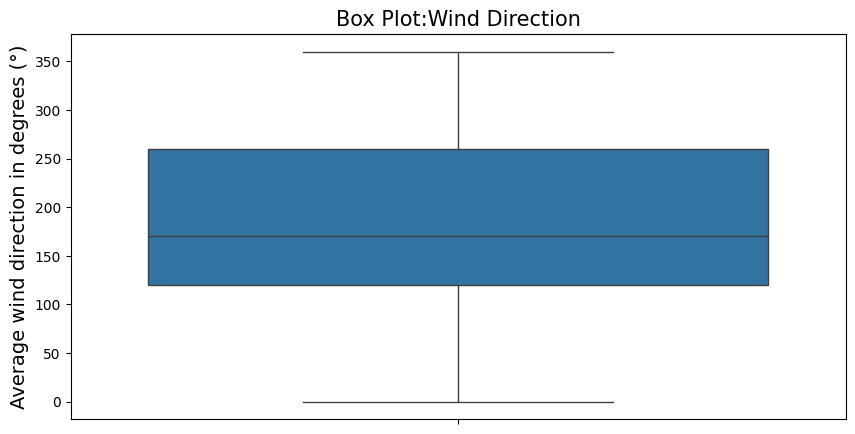

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(bonn_df.wdir)
plt.title('Box Plot:Wind Direction', fontsize=15)
plt.ylabel('Average wind direction in degrees (°)', fontsize=14)
plt.show()

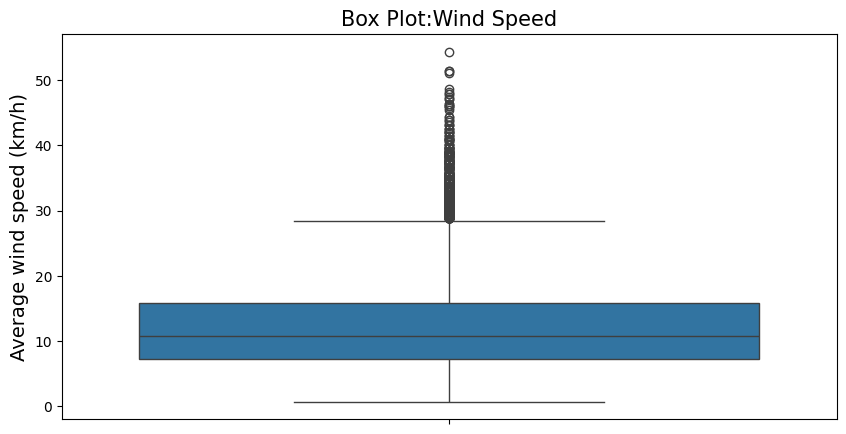

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(bonn_df.wspd)
plt.title('Box Plot:Wind Speed', fontsize=15)
plt.ylabel('Average wind speed (km/h)', fontsize=14)
plt.show()

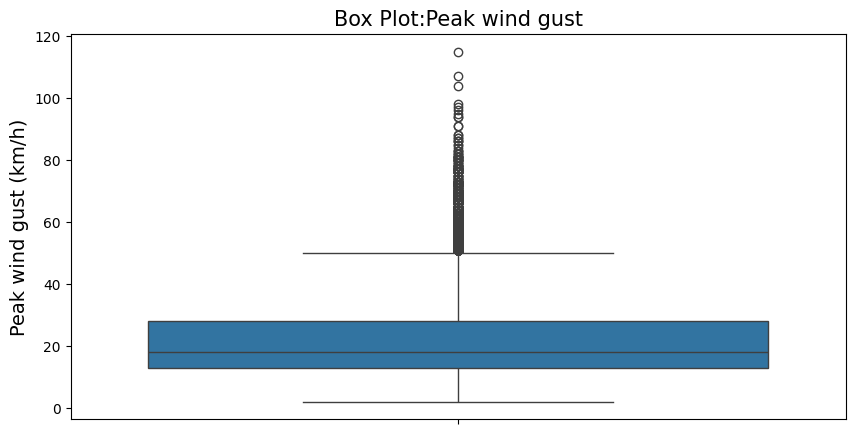

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(bonn_df.wpgt)
plt.title('Box Plot:Peak wind gust', fontsize=15)
plt.ylabel('Peak wind gust (km/h)', fontsize=14)
plt.show()

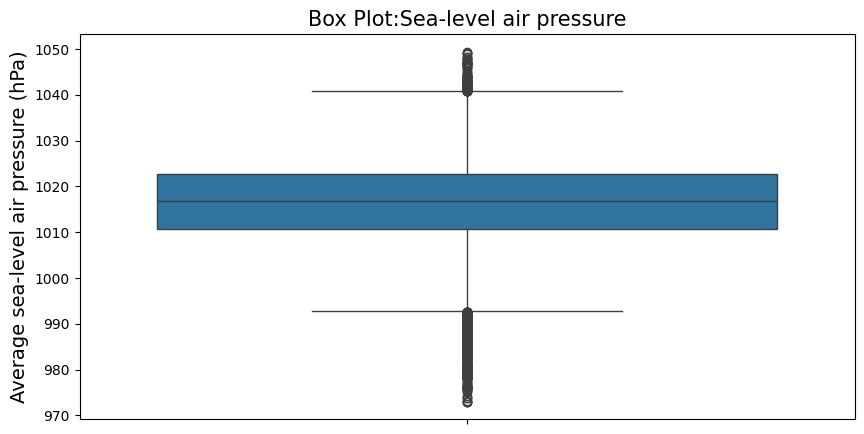

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(bonn_df.pres)
plt.title('Box Plot:Sea-level air pressure', fontsize=15)
plt.ylabel('Average sea-level air pressure (hPa)', fontsize=14)
plt.show()

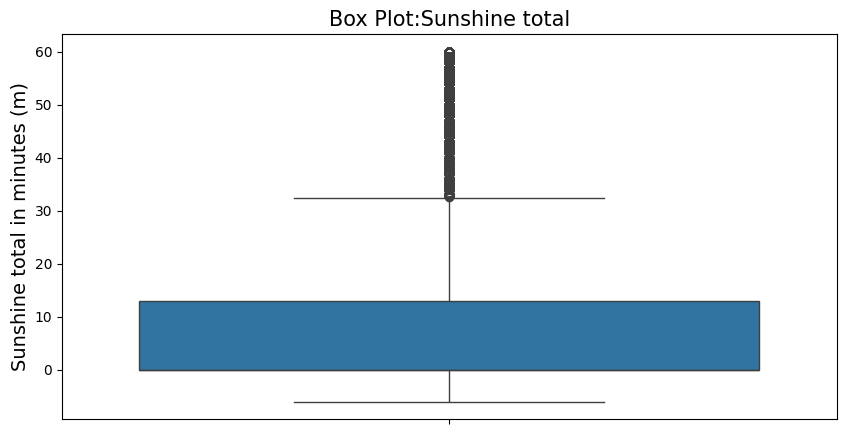

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(bonn_df.tsun)
plt.title('Box Plot:Sunshine total', fontsize=15)
plt.ylabel('Sunshine total in minutes (m)', fontsize=14)
plt.show()

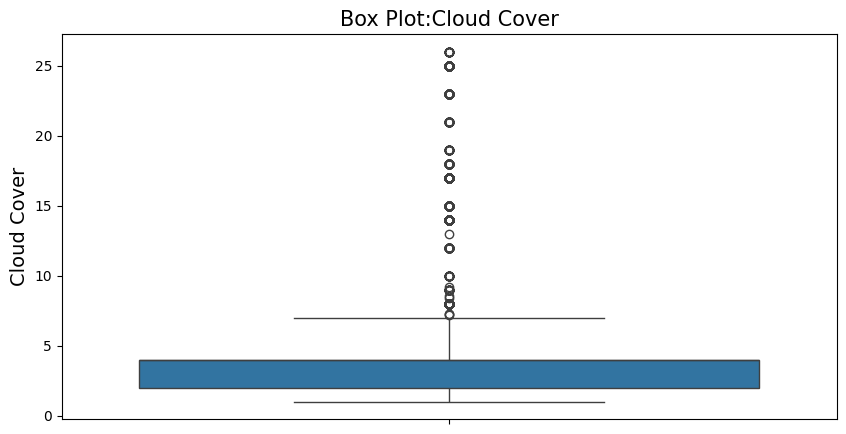

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(bonn_df.coco)
plt.title('Box Plot:Cloud Cover', fontsize=15)
plt.ylabel('Cloud Cover', fontsize=14)
plt.show()

APPLYING LOF ON BONN WEATHER DATASET

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Number of neighbors for LOF
n_neighbors = 20

# Dictionary to store the percentage of outliers for each feature
outlier_percentages = {}

# Apply LOF to each feature
for feature in bonn_df.columns:
# Reshape the data for LOF
 X = bonn_df[[feature]].values

 # Fit the LOF model
 lof = LocalOutlierFactor(n_neighbors=n_neighbors)
 y_pred = lof.fit_predict(X)

 # Identify the outliers
 outliers = y_pred == -1

 # Calculate the percentage of outliers
 percentage_outliers = np.mean(outliers) * 100
 outlier_percentages[feature] = percentage_outliers

 print(f'Percentage of outliers in Bonn wetaher in {feature}: {percentage_outliers:.2f}%')

Percentage of outliers in Bonn wetaher in temp: 0.30%
Percentage of outliers in Bonn wetaher in dwpt: 0.30%
Percentage of outliers in Bonn wetaher in rhum: 0.03%
Percentage of outliers in Bonn wetaher in prcp: 0.05%
Percentage of outliers in Bonn wetaher in wdir: 0.01%
Percentage of outliers in Bonn wetaher in wspd: 0.09%
Percentage of outliers in Bonn wetaher in wpgt: 0.36%
Percentage of outliers in Bonn wetaher in pres: 0.72%
Percentage of outliers in Bonn wetaher in tsun: 0.31%
Percentage of outliers in Bonn wetaher in coco: 0.27%


USING NAIVE BAYES ON THE WEATHER DATASET

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm


# Extract features
X = bonn_df.values

# Fit Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

# Calculate likelihoods for each data point
means = gnb.theta_
variances = gnb.var_
likelihoods = np.zeros(X.shape[0])

# Ensure means and variances are in correct shape
if means.ndim == 1:
    means = means.reshape(1, -1)
if variances.ndim == 1:
    variances = variances.reshape(1, -1)

# Calculate likelihoods for each data point
for i, x in enumerate(X):
    likelihood = 1
    for j in range(X.shape[1]):
        likelihood *= norm.pdf(x[j], loc=means[0][j], scale=np.sqrt(variances[0][j]))
    likelihoods[i] = likelihood

# Determine anomalies
threshold = np.percentile(likelihoods, 10)  # for example, consider the bottom 10% as anomalies
anomalies = np.where(likelihoods < threshold)[0]

# Calculate percentage of anomalies for each feature
anomalies_bonn_df = bonn_df.iloc[anomalies]
total_anomalies = len(anomalies)
total_data_points = len(bonn_df)

# Calculate anomaly percentage for each feature
feature_anomalies_percentage = {}
for feature in bonn_df.columns:
    feature_anomalies_count = (anomalies_bonn_df[feature] != bonn_df[feature].mode().iloc[0]).sum()
    feature_anomalies_percentage[feature] = (feature_anomalies_count / total_data_points) * 100

print("Number of anomalies detected:", total_anomalies)
print("Percentage of anomalies for each feature:")
for feature, percentage in feature_anomalies_percentage.items():
    print(f"{feature}: {percentage:.2f}%")

Number of anomalies detected: 4383
Percentage of anomalies for each feature:
temp: 9.93%
dwpt: 9.95%
rhum: 9.71%
prcp: 2.89%
wdir: 9.39%
wspd: 9.87%
wpgt: 9.69%
pres: 9.95%
tsun: 4.97%
coco: 8.85%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm



# Initialize a dictionary to store anomaly information for each feature
anomaly_info = {}

# Loop through each feature
for feature in bonn_df.columns:
    # Extract the feature values
    X = bonn_df[[feature]].values

    # Fit Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

    # Calculate likelihoods for each data point
    means = gnb.theta_
    variances = gnb.var_
    likelihoods = np.zeros(X.shape[0])

    # Ensure means and variances are in correct shape
    if means.ndim == 1:
        means = means.reshape(1, -1)
    if variances.ndim == 1:
        variances = variances.reshape(1, -1)

    # Calculate likelihoods for each data point
    for i, x in enumerate(X):
        likelihood = norm.pdf(x[0], loc=means[0][0], scale=np.sqrt(variances[0][0]))
        likelihoods[i] = likelihood

    # Determine anomalies using mean and standard deviation
    mean_likelihood = np.mean(likelihoods)
    std_likelihood = np.std(likelihoods)
    threshold = mean_likelihood - 2 * std_likelihood  # 2 standard deviations below the mean
    anomalies = np.where(likelihoods < threshold)[0]

    # Calculate percentage of anomalies for this feature
    total_anomalies = len(anomalies)
    total_data_points = len(bonn_df)
    anomaly_percentage = (total_anomalies / total_data_points) * 100

    # Store the anomaly information
    anomaly_info[feature] = {
        'total_anomalies': total_anomalies,
        'anomaly_percentage': anomaly_percentage,
        'anomalies': anomalies
    }

# Print results
for feature, info in anomaly_info.items():
    print(f"Feature: {feature}")
    print(f"  Number of anomalies detected: {info['total_anomalies']}")
    print(f"  Percentage of anomalies: {info['anomaly_percentage']:.2f}%")



Feature: temp
  Number of anomalies detected: 1931
  Percentage of anomalies: 4.41%
Feature: dwpt
  Number of anomalies detected: 1899
  Percentage of anomalies: 4.33%
Feature: rhum
  Number of anomalies detected: 2371
  Percentage of anomalies: 5.41%
Feature: prcp
  Number of anomalies detected: 1713
  Percentage of anomalies: 3.91%
Feature: wdir
  Number of anomalies detected: 1660
  Percentage of anomalies: 3.79%
Feature: wspd
  Number of anomalies detected: 2461
  Percentage of anomalies: 5.62%
Feature: wpgt
  Number of anomalies detected: 2352
  Percentage of anomalies: 5.37%
Feature: pres
  Number of anomalies detected: 2843
  Percentage of anomalies: 6.49%
Feature: tsun
  Number of anomalies detected: 5818
  Percentage of anomalies: 13.28%
Feature: coco
  Number of anomalies detected: 1269
  Percentage of anomalies: 2.90%


AUTOENCODER MODEL ON WEATHER

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential



#to save all features
features_auto_w = bonn_df.columns.tolist()


# DataFrame to store anomaly scores for each feature
anomaly_scores_auto_w = pd.DataFrame(index=bonn_df.index)

# Loop through each feature
for feature in features_auto_w :
    # Scale the feature data
    scaler = MinMaxScaler()
    scaled_feature_auto_w  = scaler.fit_transform(bonn_df[[feature]])

    # Define the autoencoder model
    model_auto_w  = Sequential([
        Dense(32, activation='relu', input_shape=(1,)),
        Dense(16, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model_auto_w .compile(optimizer='adam', loss='mean_squared_error')

     #Train the autoencoder
    model_auto_w.fit(scaled_feature_auto_w , scaled_feature_auto_w , epochs=50, batch_size=32, validation_split=0.1, verbose=0)

    # Get reconstruction loss
    reconstructed_feature_auto_w  = model_auto_w.predict(scaled_feature_auto_w )
    reconstruction_loss_auto_w  = np.mean(np.square(scaled_feature_auto_w  - reconstructed_feature_auto_w ), axis=1)

    # Store the reconstruction loss (anomaly score) in the DataFrame
    anomaly_scores_auto_w [feature] = reconstruction_loss_auto_w



1370/1370 [==============================] - 2s 2ms/step


In [ ]:

print(reconstruction_loss_auto_w)
# Calculate the threshold as the 90th percentile of the reconstruction loss
threshold_auto_w = np.percentile(reconstruction_loss_auto_w, 90)

    # Identify anomalies
anomalies_auto_w = reconstruction_loss_auto_w > threshold_auto_w

for feature in features_auto_w:
    anomalies_auto_w = anomaly_scores_auto_w[feature] > threshold_auto_w
    anomaly_percentage_auto_w = np.mean(anomalies_auto_w) * 100
    print(f'Feature: {feature}, Anomaly Percentage: {anomaly_percentage_auto_w:.2f}%')


    # Store the reconstruction loss (anomaly score) in the DataFrame
anomaly_scores_auto_w[feature] = reconstruction_loss_auto_w


# Combine anomaly scores with original data for easier analysis
combined_data_auto_w = pd.concat([bonn_df, anomaly_scores_auto_w.add_suffix('_anomaly_score')], axis=1)

# Save the combined data with anomaly scores
combined_data_auto_w.to_csv('bonn_df_with_anomaly_scores_auto_w.csv', index=False)

# Display the first few rows of the combined data
combined_data_auto_w.head()

XGBOOST ON WEATHER DATASET

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sample Data (Replace with your dataset)
# Assuming a dataframe with 100 rows and 10 features


# Define anomaly detection function
def detect_anomalies(Mun_df):
    anomalies = pd.DataFrame(index=Mun_df.index)
    anomaly_percentages = {}

    for feature in Mun_df.columns:
        X = Mun_df.drop(columns=[feature])
        y = Mun_df[feature]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train XGBoost model
        model = XGBRegressor()
        model.fit(X_train, y_train)

        # Predict on the whole dataset
        y_pred = model.predict(X)

        # Calculate prediction errors
        errors = np.abs(y - y_pred)

        # Determine dynamic threshold using standard deviation
        mean_error = np.mean(errors)
        std_error = np.std(errors)
        threshold = mean_error + 2 * std_error  # Consider 2 standard deviations from the mean

        # Flag anomalies
        anomaly_flags = errors > threshold
        anomalies[feature] = anomaly_flags

        # Calculate anomaly percentage
        anomaly_percentages[feature] = (anomaly_flags.sum() / len(Mun_df)) * 100

        # Print summary
        print(f"Feature: {feature}")
        print(f"Threshold: {threshold:.4f}")
        print(f"Anomalies detected: {anomaly_flags.sum()}/{len(Mun_df)} ({anomaly_percentages[feature]:.2f}%)")
        print("-" * 40)

    return anomalies, anomaly_percentages

# Detect anomalies
anomalies_df, anomaly_percentages = detect_anomalies(bonn_df)


# Print anomaly percentages
print("\nAnomaly Percentages per Feature:")
for feature, percentage in anomaly_percentages.items():
    print(f"{feature}: {percentage:.2f}%")


Feature: temp
Threshold: 0.3080
Anomalies detected: 1766/43824 (4.03%)
----------------------------------------
Feature: dwpt
Threshold: 0.3125
Anomalies detected: 1505/43824 (3.43%)
----------------------------------------
Feature: rhum
Threshold: 2.2305
Anomalies detected: 2010/43824 (4.59%)
----------------------------------------
Feature: prcp
Threshold: 0.5092
Anomalies detected: 1141/43824 (2.60%)
----------------------------------------
Feature: wdir
Threshold: 134.4488
Anomalies detected: 2559/43824 (5.84%)
----------------------------------------
Feature: wspd
Threshold: 3.1561
Anomalies detected: 1746/43824 (3.98%)
----------------------------------------
Feature: wpgt
Threshold: 5.5914
Anomalies detected: 1599/43824 (3.65%)
----------------------------------------
Feature: pres
Threshold: 14.2076
Anomalies detected: 2256/43824 (5.15%)
----------------------------------------
Feature: tsun
Threshold: 24.2119
Anomalies detected: 2532/43824 (5.78%)
-----------------------------

IRRADIATION DATASET

In [ ]:
import pandas as pd
import requests
#importing irradiation data for Meiningen
# URL of the webpage containing JSON data
url = "http://139.174.11.24/data?dataset=irradiationdataforcities&start=2019-01-01&end=2023-12-31&cityName=Bonn"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON data
    data = response.json()

    # Convert the data to a DataFrame
    df_irrad = pd.DataFrame.from_dict(data, orient='index')


else:
    print("Failed to fetch data. Status code:", response.status_code)


In [ ]:
df_irrad.head()

,time,Observation period,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,Reliability,cityName
1546300800000,2019-01-01 00:00:00,2019-01-01T00:00:00.0/2019-01-01T00:15:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Bonn
1546301700000,2019-01-01 00:15:00,2019-01-01T00:15:00.0/2019-01-01T00:30:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Bonn
1546302600000,2019-01-01 00:30:00,2019-01-01T00:30:00.0/2019-01-01T00:45:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Bonn
1546303500000,2019-01-01 00:45:00,2019-01-01T00:45:00.0/2019-01-01T01:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Bonn
1546304400000,2019-01-01 01:00:00,2019-01-01T01:00:00.0/2019-01-01T01:15:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Bonn


In [ ]:

# drop unwanted columns
clean_df = df_irrad.drop(columns = ["time", "Observation period", "Reliability", "cityName"])
df_irrad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175296 entries, 1546300800000 to 1704066300000
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   time                175296 non-null  object 
 1   Observation period  175296 non-null  object 
 2   TOA                 175296 non-null  object 
 3   Clear sky GHI       175296 non-null  object 
 4   Clear sky BHI       175296 non-null  object 
 5   Clear sky DHI       175296 non-null  object 
 6   Clear sky BNI       175296 non-null  object 
 7   GHI                 175296 non-null  float64
 8   BHI                 175296 non-null  object 
 9   DHI                 175296 non-null  object 
 10  BNI                 175296 non-null  object 
 11  Reliability         175296 non-null  object 
 12  cityName            175296 non-null  object 
dtypes: float64(1), object(12)
memory usage: 18.7+ MB


In [ ]:
clean_df.describe()

,GHI
count,175296.000000
mean,33.226451
std,53.521586
min,0.000000
25%,0.000000
50%,0.499050
75%,47.182875
max,234.862400


In [ ]:
#Get the percentage of null values in the dataset
clean_df.isnull().sum() /len(df_irrad) *(100)

TOA              0.0
Clear sky GHI    0.0
Clear sky BHI    0.0
Clear sky DHI    0.0
Clear sky BNI    0.0
GHI              0.0
BHI              0.0
DHI              0.0
BNI              0.0
dtype: float64

In [ ]:
clean_df.head()

,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI
1546300800000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546301700000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546302600000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546303500000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1546304400000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000


In [ ]:

# Check if -99999 exists in all columns and print columns where it exists
columns_with_value = clean_df.apply(lambda col: col.name if -99999 in col.values else None).dropna()

if len(columns_with_value) > 0:
    print(f"The value '{-99999}' exists in the following columns:")
    for col in columns_with_value:
        print(col)
else:
    print(f"The value '{-99999}' does not exist in any column.")

The value '-99999' does not exist in any column.


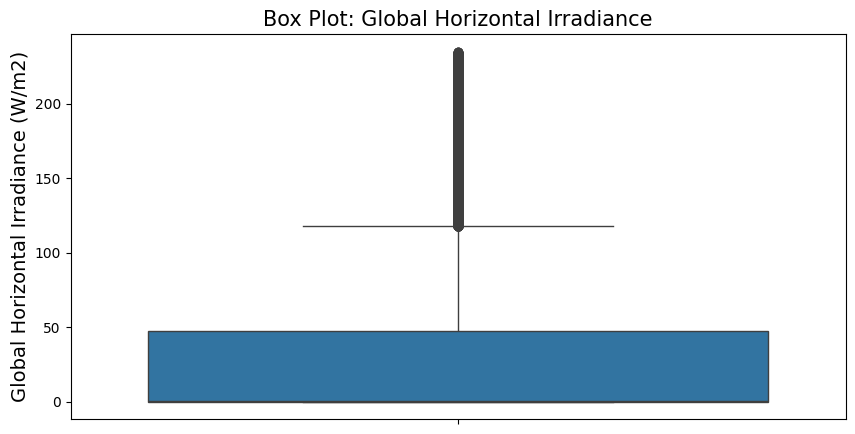

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(clean_df.GHI)
plt.title('Box Plot: Global Horizontal Irradiance', fontsize=15)
plt.ylabel('Global Horizontal Irradiance (W/m2)', fontsize=14)
plt.show()

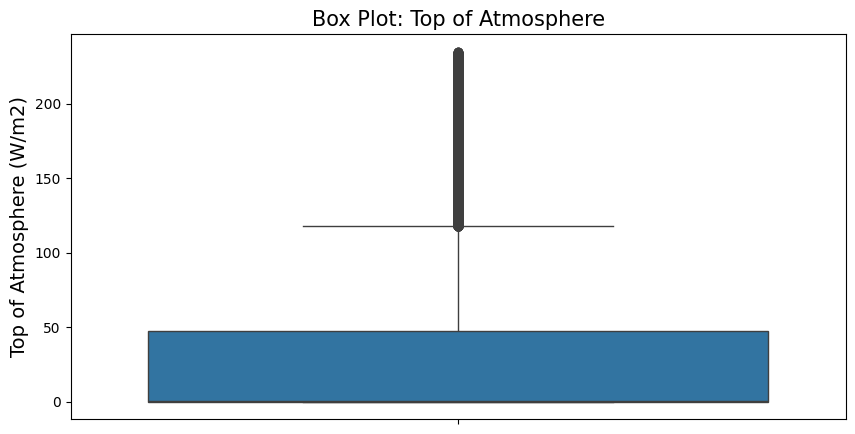

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(clean_df.GHI)
plt.title('Box Plot: Top of Atmosphere', fontsize=15)
plt.ylabel('Top of Atmosphere (W/m2)', fontsize=14)
plt.show()

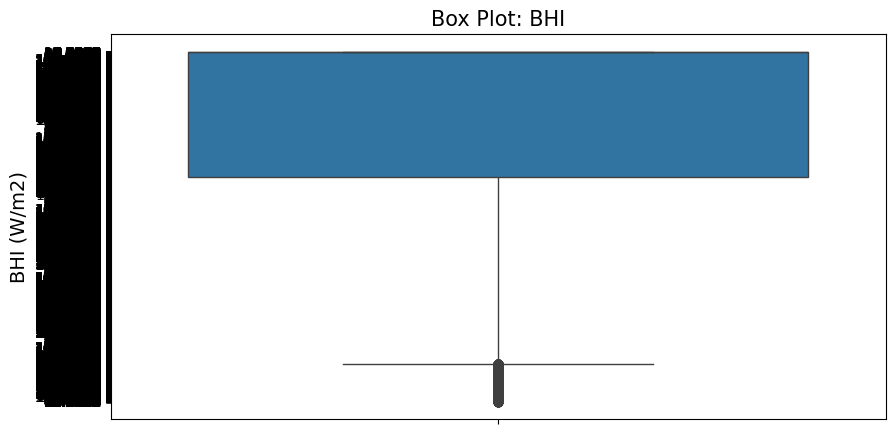

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(clean_df.BHI)
plt.title('Box Plot: BHI', fontsize=15)
plt.ylabel('BHI (W/m2)', fontsize=14)
plt.show()

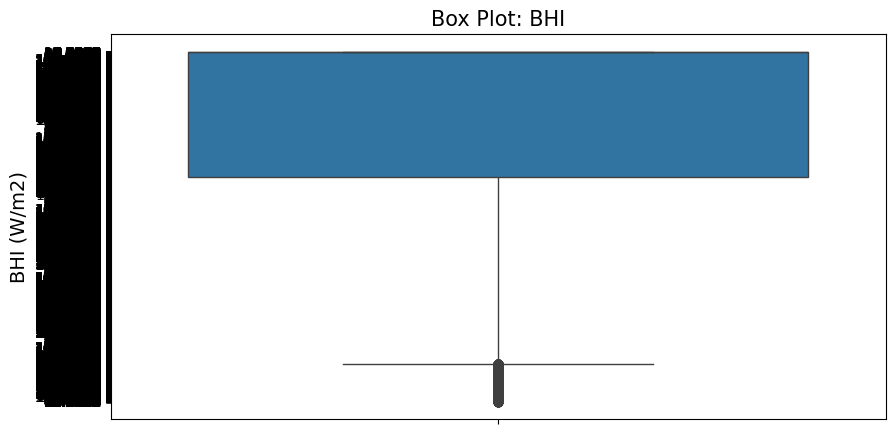

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(clean_df.BHI)
plt.title('Box Plot: BHI', fontsize=15)
plt.ylabel('BHI (W/m2)', fontsize=14)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor


# Number of neighbors for LOF
n_neighbors = 20

# Dictionary to store the percentage of outliers for each feature
outlier_percentages = {}

# Apply LOF to each feature
for feature in clean_df.columns:
# Reshape the data for LOF
 X = clean_df[[feature]].values

 # Fit the LOF model
 lof = LocalOutlierFactor(n_neighbors=n_neighbors)
 y_pred = lof.fit_predict(X)

 # Identify the outliers
 outliers = y_pred == -1

 # Calculate the percentage of outliers
 percentage_outliers = np.mean(outliers) * 100
 outlier_percentages[feature] = percentage_outliers

 print(f'Percentage of outliers in Bonn Irradiation in {feature}: {percentage_outliers:.2f}%')

Percentage of outliers in Bonn Irradiation in TOA: 0.05%
Percentage of outliers in Bonn Irradiation in Clear sky GHI: 0.01%
Percentage of outliers in Bonn Irradiation in Clear sky BHI: 0.06%
Percentage of outliers in Bonn Irradiation in Clear sky DHI: 0.02%
Percentage of outliers in Bonn Irradiation in Clear sky BNI: 0.01%
Percentage of outliers in Bonn Irradiation in GHI: 0.01%
Percentage of outliers in Bonn Irradiation in BHI: 0.14%
Percentage of outliers in Bonn Irradiation in DHI: 0.01%
Percentage of outliers in Bonn Irradiation in BNI: 0.12%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm

# Assuming clean_Osna_Irrad is your DataFrame loaded from your dataset
# Example steps to handle data types and missing values

# Step 1: Check and Convert Data Types
# Convert all columns to numeric (float64)
clean_df = clean_df.apply(pd.to_numeric, errors='coerce')

# Step 2: Handle Missing Values
clean_df = clean_df.dropna()  # Drop rows with NaN values

# Extract features
X = clean_df.values

# Fit Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

# Calculate likelihoods for each data point
means = gnb.theta_
variances = np.var(X, axis=0) + 1e-9  # Adding a small value for numerical stability

likelihoods = np.zeros(X.shape[0])

# Ensure means and variances are in correct shape
if means.ndim == 1:
    means = means.reshape(1, -1)
if variances.ndim == 1:
    variances = variances.reshape(1, -1)

# Calculate likelihoods for each data point
for i, x in enumerate(X):
    likelihood = 1
    for j in range(X.shape[1]):
        likelihood *= norm.pdf(x[j], loc=means[0][j], scale=np.sqrt(variances[0][j]))
    likelihoods[i] = likelihood

# Determine anomalies
threshold = np.percentile(likelihoods, 10)  # for example, consider the bottom 10% as anomalies
anomalies = np.where(likelihoods < threshold)[0]

# Calculate percentage of anomalies for each feature
anomalies_clean_df = clean_df.iloc[anomalies]
total_anomalies = len(anomalies)
total_data_points = len(clean_df)

# Calculate anomaly percentage for each feature
feature_anomalies_percentage = {}
for feature in clean_df.columns:
    feature_anomalies_count = (anomalies_clean_df[feature] != clean_df[feature].mode().iloc[0]).sum()
    feature_anomalies_percentage[feature] = (feature_anomalies_count / total_data_points) * 100

print("Number of anomalies detected:", total_anomalies)
print("Percentage of anomalies for each feature:")
for feature, percentage in feature_anomalies_percentage.items():
    print(f"{feature}: {percentage:.2f}%")


Number of anomalies detected: 17530
Percentage of anomalies for each feature:
TOA: 10.00%
Clear sky GHI: 10.00%
Clear sky BHI: 10.00%
Clear sky DHI: 10.00%
Clear sky BNI: 10.00%
GHI: 10.00%
BHI: 9.99%
DHI: 10.00%
BNI: 9.99%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm


# Initialize a dictionary to store anomaly information for each feature
anomaly_info = {}

# Loop through each feature
for feature in BONN_clean.columns:
    # Extract the feature values
    X = BONN_clean[[feature]].values

    # Fit Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

    # Calculate likelihoods for each data point
    means = gnb.theta_
    variances = gnb.var_
    likelihoods = np.zeros(X.shape[0])

    # Ensure means and variances are in correct shape
    if means.ndim == 1:
        means = means.reshape(1, -1)
    if variances.ndim == 1:
        variances = variances.reshape(1, -1)

    # Calculate likelihoods for each data point
    for i, x in enumerate(X):
        likelihood = norm.pdf(x[0], loc=means[0][0], scale=np.sqrt(variances[0][0]))
        likelihoods[i] = likelihood

    # Determine anomalies using mean and standard deviation
    mean_likelihood = np.mean(likelihoods)
    std_likelihood = np.std(likelihoods)
    threshold = mean_likelihood - 2 * std_likelihood  # 2 standard deviations below the mean
    anomalies = np.where(likelihoods < threshold)[0]

    # Calculate percentage of anomalies for this feature
    total_anomalies = len(anomalies)
    total_data_points = len(BONN_clean)
    anomaly_percentage = (total_anomalies / total_data_points) * 100

    # Store the anomaly information
    anomaly_info[feature] = {
        'total_anomalies': total_anomalies,
        'anomaly_percentage': anomaly_percentage,
        'anomalies': anomalies
    }

# Print results
for feature, info in anomaly_info.items():
    print(f"Feature: {feature}")
    print(f"  Number of anomalies detected: {info['total_anomalies']}")
    print(f"  Percentage of anomalies: {info['anomaly_percentage']:.2f}%")



AUTOENCODER MODEL FOR IRRADIATION

In [ ]:
df_irrad.head()

df_irrad = df_irrad.drop(columns=["Reliability", "cityName", "time", "Observation period"])

df_irrad.head()

In [ ]:
# import numpy as np
# import pandas as pd
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential



# #to save all features
# features_auto_i = df_irrad.columns.tolist()


# # DataFrame to store anomaly scores for each feature
# anomaly_scores_auto_i = pd.DataFrame(index=df_irrad.index)

# # Loop through each feature
# for feature in features_auto_i :
#     # Scale the feature data
#     scaler = MinMaxScaler()
#     scaled_feature_auto_i  = scaler.fit_transform(df_irrad[[feature]])

#     # Define the autoencoder model
#     model_auto_i  = Sequential([
#         Dense(32, activation='relu', input_shape=(1,)),
#         Dense(16, activation='relu'),
#         Dense(32, activation='relu'),
#         Dense(1, activation='sigmoid')
#     ])

#     model_auto_i .compile(optimizer='adam', loss='mean_squared_error')

#      #Train the autoencoder
#     model_auto_i.fit(scaled_feature_auto_i , scaled_feature_auto_i , epochs=50, batch_size=32, validation_split=0.1, verbose=0)

#     # Get reconstruction loss
#     reconstructed_feature_auto_i  = model_auto_i.predict(scaled_feature_auto_i)
#     reconstruction_loss_auto_i  = np.mean(np.square(scaled_feature_auto_i  - reconstructed_feature_auto_i), axis=1)

#     # Store the reconstruction loss (anomaly score) in the DataFrame
#     anomaly_scores_auto_i [feature] = reconstruction_loss_auto_i



In [ ]:

# print(reconstruction_loss_auto_i)
# # Calculate the threshold as the 90th percentile of the reconstruction loss
# threshold_auto_i = np.percentile(reconstruction_loss_auto_i, 90)

#     # Identify anomalies
# anomalies_auto_i = reconstruction_loss_auto_i > threshold_auto_i

# for feature in features_auto_i:
#     anomalies_auto_i = anomaly_scores_auto_i[feature] > threshold_auto_i
#     anomaly_percentage_auto_i = np.mean(anomalies_auto_i) * 100
#     print(f'Feature: {feature}, Anomaly Percentage: {anomaly_percentage_auto_i:.2f}%')


#     # Store the reconstruction loss (anomaly score) in the DataFrame
# anomaly_scores_auto_i[feature] = reconstruction_loss_auto_i


# # Combine anomaly scores with original data for easier analysis
# combined_data_auto_i = pd.concat([df_irrad, anomaly_scores_auto_i.add_suffix('_anomaly_score')], axis=1)

# # Save the combined data with anomaly scores
# combined_data_auto_i.to_csv('df_irrad_with_anomaly_scores_auto_i.csv', index=False)

# # Display the first few rows of the combined data
# combined_data_auto_i.head()






XGBOOST ON IRRADIATION DATASET

In [ ]:
BONN_clean = clean_df.select_dtypes(include=['object']).astype('float')
BONN_clean["GHI"] = clean_df["GHI"]
BONN_clean.info()

In [ ]:
mask = BONN_clean["GHI"] ==0.0
(len(BONN_clean[mask])/len(BONN_clean)) *100


In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sample Data (Replace with your dataset)
# Assuming a dataframe with 100 rows and 10 features


# Define anomaly detection function
def detect_anomalies(Mun_df):
    anomalies = pd.DataFrame(index=Mun_df.index)
    anomaly_percentages = {}

    for feature in Mun_df.columns:
        X = Mun_df.drop(columns=[feature])
        y = Mun_df[feature]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train XGBoost model
        model = XGBRegressor()
        model.fit(X_train, y_train)

        # Predict on the whole dataset
        y_pred = model.predict(X)

        # Calculate prediction errors
        errors = np.abs(y - y_pred)

        # Determine dynamic threshold using standard deviation
        mean_error = np.mean(errors)
        std_error = np.std(errors)
        threshold = mean_error + 2 * std_error  # Consider 2 standard deviations from the mean

        # Flag anomalies
        anomaly_flags = errors > threshold
        anomalies[feature] = anomaly_flags

        # Calculate anomaly percentage
        anomaly_percentages[feature] = (anomaly_flags.sum() / len(Mun_df)) * 100

        # Print summary
        print(f"Feature: {feature}")
        print(f"Threshold: {threshold:.4f}")
        print(f"Anomalies detected: {anomaly_flags.sum()}/{len(Mun_df)} ({anomaly_percentages[feature]:.2f}%)")
        print("-" * 40)

    return anomalies, anomaly_percentages

# Detect anomalies
anomalies_df, anomaly_percentages = detect_anomalies(BONN_clean)


# Print anomaly percentages
print("\nAnomaly Percentages per Feature:")
for feature, percentage in anomaly_percentages.items():
    print(f"{feature}: {percentage:.2f}%")
